# Aula 16

Regressão Logística

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

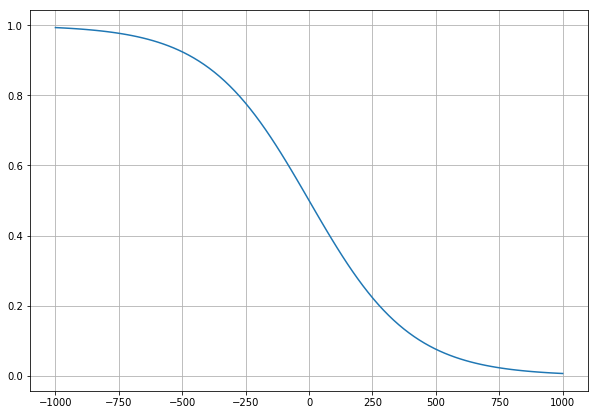

In [33]:
x = np.linspace(-1000, 1000, 100)
c0 = 0
c1 = -0.005
f = lambda x: c0 + c1*x
y = 1/(1 + np.exp(-f(x)))

plt.figure(figsize=(10,8))

plt.plot(x, y)
plt.grid()
plt.show()

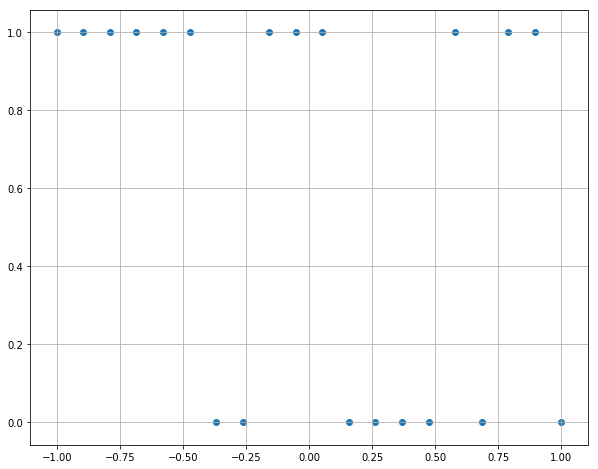

In [87]:
x = np.linspace(-1, 1, 20)
y = np.array(sigmoid(c0, c1, x) < np.random.rand(x.shape[0]), dtype=np.float32)

plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.grid()
plt.show()

In [70]:
def sigmoid(c0, c1, x):
    return 1/(1 + np.exp(-(c0 + c1*x)))

def sigmoid2(c0, c1, x):
    return c0 + c1*x

def f(c0, c1, x, y):
    return np.sum((y - sigmoid(c0, c1, x))**2)

def grad(c0, c1, x, y):
    return np.array(
        [-2 * (y - sigmoid(c0, c1, x)) * sigmoid(c0, c1, x) * (1 - sigmoid(c0, c1, x)),
        x*(-2 * (y - sigmoid(c0, c1, x)) * sigmoid(c0, c1, x) * (1 - sigmoid(c0, c1, x)))]
    )

In [84]:
def logistic_loss(c0, c1, x, y):
    return (1/x.shape[0])* np.sum(-y * np.log(sigmoid(c0,c1,x)) - (1-y) * sigmoid(c0,c1,(1-x)))

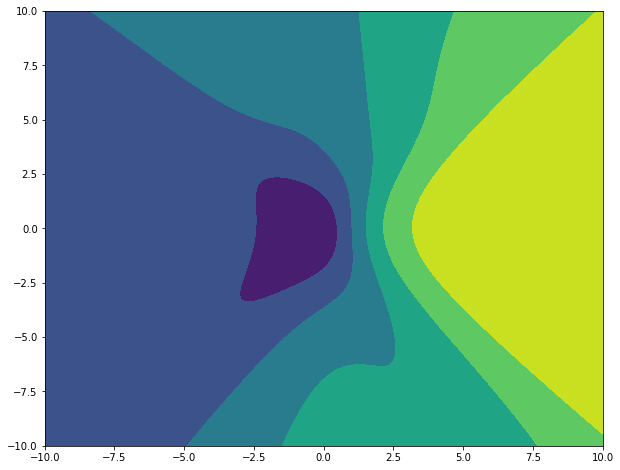

In [71]:
C0 = np.linspace(-10, 10, 500)
C1 = np.linspace(-10, 10, 500)
C0, C1 = np.meshgrid(C0, C1)

# Z = np.vectorize(f)(C0, C1, x, y)
Z = []
for i in range(C0.shape[0]):
    Z.append([])
    for j in range(C0.shape[1]):
        Z[i].append(f(C0[i][j], C1[i][j], x, y))
        
Z = np.array(Z)

plt.figure(figsize=(10, 8))
plt.contourf(C0, C1, Z)
plt.show()

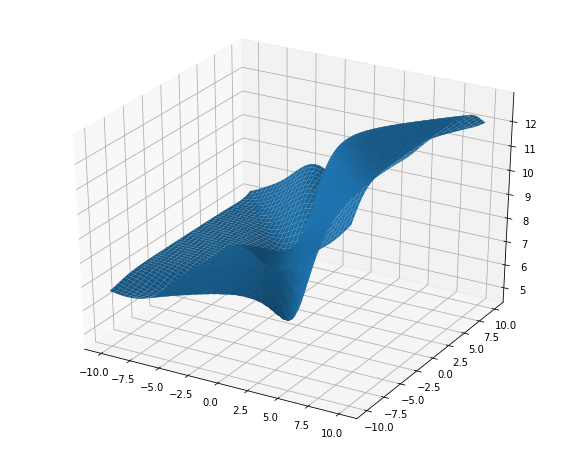

In [77]:
ax = plt.figure(figsize=(10,8)).add_subplot(111, projection='3d')
ax.plot_surface(C0, C1, Z)
plt.show()

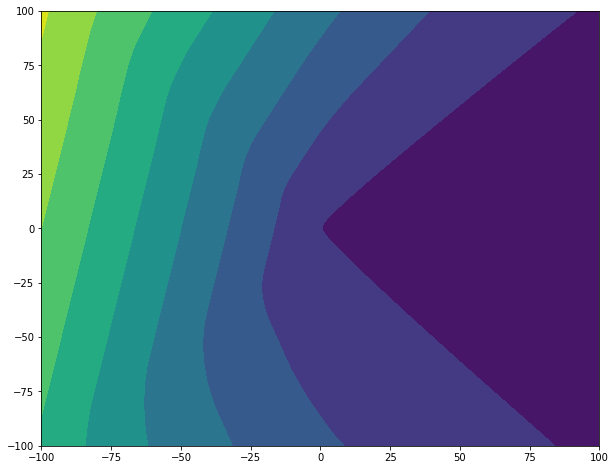

In [92]:
C0 = np.linspace(-100, 100, 500)
C1 = np.linspace(-100, 100, 500)
C0, C1 = np.meshgrid(C0, C1)

# Z = np.vectorize(f)(C0, C1, x, y)
Z = []
for i in range(C0.shape[0]):
    Z.append([])
    for j in range(C0.shape[1]):
        Z[i].append(logistic_loss(C0[i][j], C1[i][j], x, y))
        
Z = np.array(Z)

plt.figure(figsize=(10, 8))
plt.contourf(C0, C1, Z)
plt.show()